# COVID-19 Model

__Importing Modules__

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

__Loading the Dataset__

In [4]:
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
india_url = "https://api.covid19india.org/csv/latest/states.csv"

In [5]:
conf_df = pd.read_csv(confirmed_url)
rec_df = pd.read_csv(recovered_url)
deaths_df = pd.read_csv(deaths_url)
india_df = pd.read_csv(india_url)

_______________________________________________________________________________________________________________________________

## Inspecting Data

__Shape and Size__

In [6]:
conf_df.shape, conf_df.size

((266, 258), 68628)

In [7]:
conf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 258 entries, Province/State to 10/1/20
dtypes: float64(2), int64(254), object(2)
memory usage: 534.1+ KB


__Unique Values__

In [8]:
conf_df.nunique()

Province/State     81
Country/Region    188
Lat               262
Long              263
1/22/20            11
                 ... 
9/27/20           258
9/28/20           262
9/29/20           263
9/30/20           261
10/1/20           261
Length: 258, dtype: int64

__Data from India__

In [10]:
india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7205 non-null   object 
 1   State      7205 non-null   object 
 2   Confirmed  7205 non-null   int64  
 3   Recovered  7205 non-null   int64  
 4   Deceased   7205 non-null   int64  
 5   Other      7205 non-null   int64  
 6   Tested     6455 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 337.8+ KB


## Cleaning Data

__Drop all individual state data__

In [14]:
india_df = india_df[india_df.State == "India"]

__Fill NaN of "Tested" with change in "Confirmed"__

In [15]:
india_df["Tested"].fillna(india_df["Confirmed"].diff(), inplace = True)

__Standardise Date format__

In [16]:
india_df["Date"] = pd.to_datetime(india_df["Date"])

__Drop "State" column__

In [17]:
india_df.drop("State", axis = 1, inplace = True)

__Drop "Lat" and "Long" columns__

In [18]:
conf_df.drop(["Long", "Lat"], axis = 1, inplace = True)
rec_df.drop(["Long", "Lat"], axis = 1, inplace = True)
deaths_df.drop(["Long", "Lat"], axis = 1, inplace = True)

__Group data by Country and sum cases__

In [19]:
conf_df = conf_df.groupby("Country/Region").sum()
rec_df = rec_df.groupby("Country/Region").sum()
deaths_df = deaths_df.groupby("Country/Region").sum()

## Preparing Data

__Add "Active" cases column__

In [20]:
india_df["Active"] = india_df["Confirmed"] - india_df["Recovered"] - india_df["Deceased"] - india_df["Other"]

__Add "Other" values to "Deceased"__

In [21]:
india_df["Deceased"] = india_df["Deceased"] + india_df["Other"]

__Drop "Other" column__

In [22]:
india_df.drop("Other", axis = 1, inplace = True)

__Sum rows to get global cases data__

In [23]:
conf_df = conf_df.sum()
rec_df = rec_df.sum()
deaths_df = deaths_df.sum()

__Create DataFrame for global dataset__

In [24]:
global_df = pd.DataFrame()
global_df["Confirmed"] = conf_df
global_df["Recovered"] = rec_df
global_df["Deceased"] = deaths_df

__Add "Active" cases column for global DataFrame__

In [25]:
global_df["Active"] = global_df["Confirmed"] - global_df["Recovered"] - global_df["Deceased"]

In [27]:
global_df.columns = ["confirmed", "recovered", "deceased", "active"]

__Set "Date" as index for India DataFrame__

In [29]:
india_df.set_index("Date", inplace = True)

In [30]:
india_df.columns = ["confirmed", "recovered", "deceased", "tested", "active"]

In [31]:
global_df["active_growth"] = global_df["active"].diff()
india_df["active_growth"] = india_df["active"].diff()

In [32]:
global_df["growth"] = global_df["confirmed"].diff()
india_df["growth"] =  india_df["confirmed"].diff()

In [33]:
global_df["case_fatality_rate"] = global_df["deceased"].div(global_df["confirmed"]) * 100
india_df["case_fatality_rate"] = india_df["deceased"].div(india_df["confirmed"]) * 100

## Visualizing Data from India

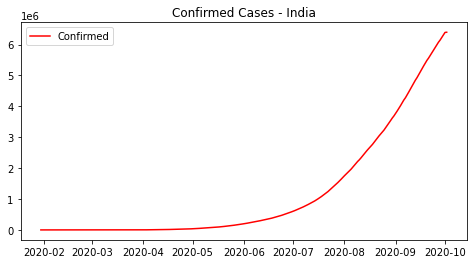

In [44]:
fig = plt.figure(figsize = (8, 4))

axis0 = fig.add_subplot(1, 1 , 1)
axis0.set_title("Confirmed Cases - India")
axis0.plot(india_df["confirmed"], color = "red", label = "Confirmed")
axis0.legend();

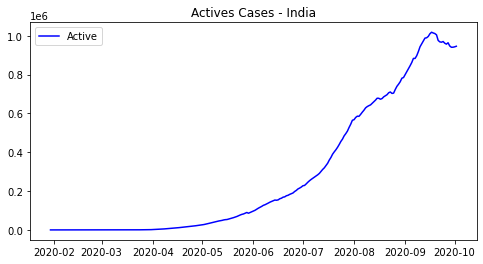

In [45]:
fig = plt.figure(figsize = (8, 4))

axis1 = fig.add_subplot(1, 1 , 1)
axis1.set_title("Actives Cases - India")
axis1.plot(india_df["active"], color = "blue", label = "Active")
axis1.legend();

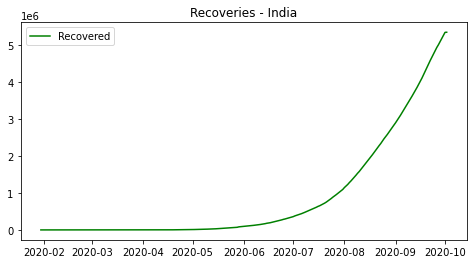

In [46]:
fig = plt.figure(figsize = (8, 4))

axis2 = fig.add_subplot(1, 1, 1)
axis2.set_title("Recoveries - India")
axis2.plot(india_df["recovered"], color = "green", label = "Recovered")
axis2.legend();

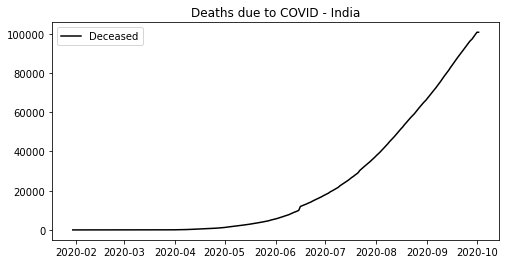

In [47]:
fig = plt.figure(figsize = (8, 4))

axis3 = fig.add_subplot(1, 1, 1)
axis3.set_title("Deaths due to COVID - India")
axis3.plot(india_df["deceased"], color = "black", label = "Deceased")
axis3.legend()

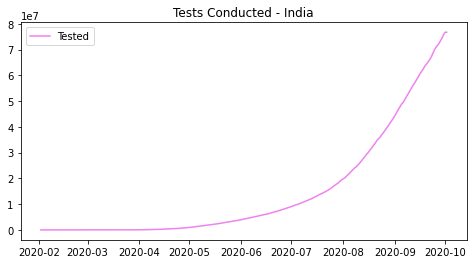

In [48]:
fig = plt.figure(figsize = (8, 4))

axis4 = fig.add_subplot(1, 1, 1)
axis4.set_title("Tests Conducted - India")
axis4.plot(india_df["tested"], color = "violet", label = "Tested")
axis4.legend()

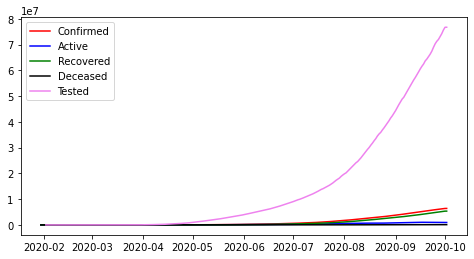

In [49]:
fig = plt.figure(figsize = (8, 4))

axis = fig.add_subplot(1, 1, 1)
axis.plot(india_df["confirmed"], color = "red", label = "Confirmed")
axis.plot(india_df["active"], color = "blue", label = "Active")
axis.plot(india_df["recovered"], color = "green", label = "Recovered")
axis.plot(india_df["deceased"], color = "black", label = "Deceased")
axis.plot(india_df["tested"], color = "violet", label = "Tested")
axis.legend()
plt.show()

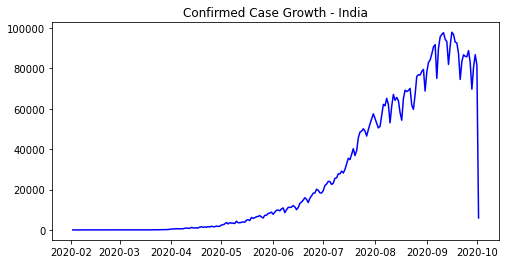

In [50]:
fig = plt.figure(figsize = (8, 4))

axis = fig.add_subplot(1, 1 , 1)
axis.set_title("Confirmed Case Growth - India")
axis.plot(india_df["growth"], color = "blue");

In [51]:
india_df["growth"].max()

97860.0

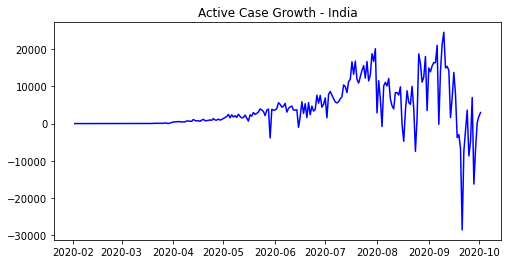

In [53]:
fig = plt.figure(figsize = (8, 4))

axis = fig.add_subplot(1, 1 , 1)
axis.set_title("Active Case Growth - India")
axis.plot(india_df["active_growth"], color = "blue");